<a href="https://colab.research.google.com/github/flavio641/Modelos_Aprendizados_Maquinas/blob/main/Classifica%C3%A7%C3%A3o_com_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [6]:
from pycaret.datasets import get_data
dados = get_data('insurance') 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


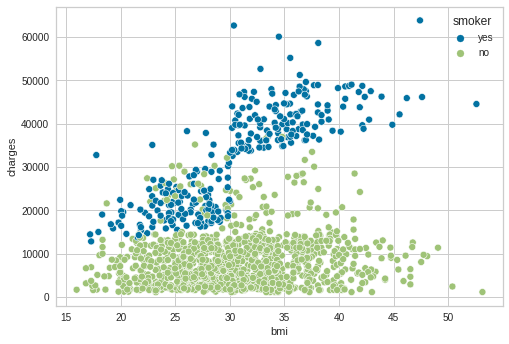

In [7]:
import seaborn as sns
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

# ***Objetivo: construir um modelo para detectar fumantes e possiveis fraudadores dessa variaveis ***

In [8]:
from pycaret.classification import setup, models, create_model, tune_model, \
                               compare_models, blend_models, stack_models, \
                               predict_model, evaluate_model, \
                               finalize_model, save_model, load_model

In [9]:
classificacao = setup(data = dados,
                      target = 'smoker',
                      normalize = True)

,Description,Value
0,session_id,8170
1,Target,smoker
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(1338, 7)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='smoker',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                                                  target='smoker')),
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers',

In [10]:
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [11]:
melhores = compare_models(n_select = 3, sort = 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9605,0.9907,0.9278,0.8823,0.9022,0.8776,0.8798,0.125
gbc,Gradient Boosting Classifier,0.9584,0.9899,0.9333,0.8700,0.8982,0.8722,0.8748,0.135
dt,Decision Tree Classifier,0.9583,0.9319,0.8889,0.9016,0.8917,0.8660,0.8687,0.013
rf,Random Forest Classifier,0.9391,0.9846,0.8667,0.8358,0.8469,0.8092,0.8124,0.223
lr,Logistic Regression,0.9380,0.9852,0.8278,0.8550,0.8378,0.7997,0.8023,0.389
ada,Ada Boost Classifier,0.9380,0.9801,0.8611,0.8329,0.8442,0.8057,0.8078,0.107
svm,SVM - Linear Kernel,0.9370,0.0000,0.8556,0.8257,0.8376,0.7987,0.8009,0.013
et,Extra Trees Classifier,0.9316,0.9795,0.7778,0.8640,0.8111,0.7700,0.7767,0.192
lda,Linear Discriminant Analysis,0.9188,0.9804,0.7667,0.8188,0.7851,0.7356,0.7408,0.014
knn,K Neighbors Classifier,0.9177,0.9657,0.7111,0.8492,0.7687,0.7194,0.7271,0.027


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8170, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0

In [12]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9574,0.9971,0.9444,0.8500,0.8947,0.8682,0.8701
1,0.9681,0.9912,0.9444,0.8947,0.9189,0.8991,0.8996
2,0.9149,0.9854,0.9444,0.7083,0.8095,0.7562,0.7691
3,0.9681,0.9971,0.8889,0.9412,0.9143,0.8947,0.8952
4,0.9894,1.0000,0.9444,1.0000,0.9714,0.9649,0.9655
5,0.9468,0.9883,0.9444,0.8095,0.8718,0.8385,0.8425
6,0.9247,0.9615,0.8333,0.7895,0.8108,0.7639,0.7643
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9892,0.9993,1.0000,0.9474,0.9730,0.9663,0.9668


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8170, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [13]:
lightgbm_tunado = tune_model(lightgbm, optimize = 'Accuracy', n_iter = 20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9574,0.9956,1.0000,0.8182,0.9000,0.8733,0.8804
1,0.9574,0.9898,0.9444,0.8500,0.8947,0.8682,0.8701
2,0.9255,0.9781,0.9444,0.7391,0.8293,0.7826,0.7922
3,0.9787,0.9978,0.9444,0.9444,0.9444,0.9313,0.9313
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9362,0.9737,1.0000,0.7500,0.8571,0.8171,0.8311
6,0.9247,0.9611,0.8889,0.7619,0.8205,0.7732,0.7769
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9892,0.9919,1.0000,0.9474,0.9730,0.9663,0.9668


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(bagging_fraction=0.5, bagging_freq=0, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=41, min_child_weight=0.001, min_split_gain=0.5,
               n_estimators=170, n_jobs=-1, num_leaves=40, objective=None,
               random_state=8170, reg_alpha=2, reg_lambda=0.5, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [16]:
modelo_combinado = blend_models(melhores, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9681,0.9963,0.9444,0.8947,0.9189,0.8991,0.8996
1,0.9574,0.9942,0.9444,0.8500,0.8947,0.8682,0.8701
2,0.9362,0.9832,1.0000,0.7500,0.8571,0.8171,0.8311
3,0.9787,0.9985,0.9444,0.9444,0.9444,0.9313,0.9313
4,0.9787,1.0000,0.8889,1.0000,0.9412,0.9282,0.9306
5,0.9468,0.9854,0.9444,0.8095,0.8718,0.8385,0.8425
6,0.9355,0.9822,0.8889,0.8000,0.8421,0.8017,0.8035
7,0.9892,1.0000,0.9444,1.0000,0.9714,0.9648,0.9654
8,0.9785,0.9985,0.9444,0.9444,0.9444,0.9311,0.9311


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=8170, reg_alpha=0.0,
                                             reg_lambda=0.0, silent

In [17]:
modelo_stack = stack_models(melhores)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9787,0.9978,1.0000,0.9000,0.9474,0.9341,0.9361
1,0.9787,0.9978,1.0000,0.9000,0.9474,0.9341,0.9361
2,0.9255,0.9795,0.9444,0.7391,0.8293,0.7826,0.7922
3,0.9787,0.9985,0.9444,0.9444,0.9444,0.9313,0.9313
4,0.9787,1.0000,0.8889,1.0000,0.9412,0.9282,0.9306
5,0.9362,0.9832,0.9444,0.7727,0.8500,0.8100,0.8166
6,0.9355,0.9793,0.8889,0.8000,0.8421,0.8017,0.8035
7,0.9892,1.0000,0.9444,1.0000,0.9714,0.9648,0.9654
8,0.9677,0.9941,0.8889,0.9412,0.9143,0.8944,0.8950


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:StackingClassifier(cv=5,
                   estimators=[('lightgbm',
                                LGBMClassifier(boosting_type='gbdt',
                                               class_weight=None,
                                               colsample_bytree=1.0,
                                               importance_type='split',
                                               learning_rate=0.1, max_depth=-1,
                                               min_child_samples=20,
                                               min_child_weight=0.001,
                                               min_split_gain=0.0,
                                               n_estimators=100, n_jobs=-1,
                                               num_leaves=31, objective=None,
                                               random_state=8170, reg_alpha=0.0,
                  

In [18]:
melhores_tunados = [tune_model(i) for i in melhores]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9574,0.9883,1.0000,0.8182,0.9000,0.8733,0.8804
1,0.9681,0.9792,1.0000,0.8571,0.9231,0.9031,0.9074
2,0.9043,0.9474,1.0000,0.6667,0.8000,0.7403,0.7666
3,0.9468,0.9591,0.9444,0.8095,0.8718,0.8385,0.8425
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9362,0.9759,1.0000,0.7500,0.8571,0.8171,0.8311
6,0.9355,0.9437,0.9444,0.7727,0.8500,0.8094,0.8160
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9785,0.9874,1.0000,0.9000,0.9474,0.9339,0.9359


INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 11
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=8170, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [20]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9468,0.9912,0.8333,0.8824,0.8571,0.8245,0.8250
1,0.9362,0.9883,0.8333,0.8333,0.8333,0.7939,0.7939
2,0.9149,0.9686,0.8889,0.7273,0.8000,0.7466,0.7527
3,0.9468,0.9898,0.8333,0.8824,0.8571,0.8245,0.8250
4,0.9468,0.9956,0.7778,0.9333,0.8485,0.8165,0.8215
5,0.9255,0.9744,0.8889,0.7619,0.8205,0.7739,0.7775
6,0.9140,0.9630,0.7778,0.7778,0.7778,0.7244,0.7244
7,0.9462,0.9941,0.8333,0.8824,0.8571,0.8241,0.8246
8,0.9677,0.9926,0.8889,0.9412,0.9143,0.8944,0.8950


INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 12
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8170, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [21]:
lr_tunado = tune_model(lr, optimize = 'Accuracy', n_iter = 20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9681,0.9898,1.0000,0.8571,0.9231,0.9031,0.9074
1,0.9574,0.9883,1.0000,0.8182,0.9000,0.8733,0.8804
2,0.9043,0.9656,1.0000,0.6667,0.8000,0.7403,0.7666
3,0.9681,0.9905,1.0000,0.8571,0.9231,0.9031,0.9074
4,0.9787,0.9978,0.9444,0.9444,0.9444,0.9313,0.9313
5,0.9362,0.9751,1.0000,0.7500,0.8571,0.8171,0.8311
6,0.9570,0.9630,1.0000,0.8182,0.9000,0.8730,0.8801
7,0.9785,0.9956,1.0000,0.9000,0.9474,0.9339,0.9359
8,0.9785,0.9911,1.0000,0.9000,0.9474,0.9339,0.9359


INFO:logs:create_model_container: 25
INFO:logs:master_model_container: 25
INFO:logs:display_container: 13
INFO:logs:LogisticRegression(C=7.046, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8170, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [22]:
modelo_combinado_2 = blend_models(melhores_tunados, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9574,0.9956,1.0000,0.8182,0.9000,0.8733,0.8804
1,0.9681,0.9890,1.0000,0.8571,0.9231,0.9031,0.9074
2,0.9362,0.9890,1.0000,0.7500,0.8571,0.8171,0.8311
3,0.9468,0.9956,0.8889,0.8421,0.8649,0.8318,0.8323
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9362,0.9788,1.0000,0.7500,0.8571,0.8171,0.8311
6,0.9355,0.9674,0.9444,0.7727,0.8500,0.8094,0.8160
7,0.9892,1.0000,0.9444,1.0000,0.9714,0.9648,0.9654
8,0.9892,0.9911,1.0000,0.9474,0.9730,0.9663,0.9668


INFO:logs:create_model_container: 26
INFO:logs:master_model_container: 26
INFO:logs:display_container: 14
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(bagging_fraction=0.5,
                                             bagging_freq=0,
                                             boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             feature_fraction=0.5,
                                             importance_type='split',
                                             learning_rate=0.4, max_depth=-1,
                                             min_child_samples=41,
                                             min_child_weight=0.001,
                                             min_split_gain=0.5,
                                             n_estimators=170, n_jobs=-1,
                          

In [23]:
modelo_stack_2 = stack_models(melhores_tunados)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9681,0.9927,1.0000,0.8571,0.9231,0.9031,0.9074
1,0.9787,0.9934,1.0000,0.9000,0.9474,0.9341,0.9361
2,0.9362,0.9825,1.0000,0.7500,0.8571,0.8171,0.8311
3,0.9681,0.9942,0.9444,0.8947,0.9189,0.8991,0.8996
4,0.9787,1.0000,0.8889,1.0000,0.9412,0.9282,0.9306
5,0.9362,0.9759,1.0000,0.7500,0.8571,0.8171,0.8311
6,0.9355,0.9667,0.8889,0.8000,0.8421,0.8017,0.8035
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9785,0.9919,0.9444,0.9444,0.9444,0.9311,0.9311


INFO:logs:create_model_container: 27
INFO:logs:master_model_container: 27
INFO:logs:display_container: 15
INFO:logs:StackingClassifier(cv=5,
                   estimators=[('lightgbm',
                                LGBMClassifier(bagging_fraction=0.5,
                                               bagging_freq=0,
                                               boosting_type='gbdt',
                                               class_weight=None,
                                               colsample_bytree=1.0,
                                               feature_fraction=0.5,
                                               importance_type='split',
                                               learning_rate=0.4, max_depth=-1,
                                               min_child_samples=41,
                                               min_child_weight=0.001,
                                               min_split_gain=0.5,
                                               n_es

In [24]:
evaluate_model(lr_tunado)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=7.046, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8170, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [25]:
pred = predict_model(lr_tunado)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=7.046, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8170, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9652,0.9879,1.0,0.8704,0.9307,0.9076,0.9115


In [26]:
pred

,age,bmi,charges,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,region_northeast,region_northwest,region_southeast,region_southwest,smoker,Label,Score
0,-1.526309,0.205583,-0.914910,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,no,no,0.9994
1,-1.096798,-1.146037,-0.902440,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,no,no,0.9793
2,1.265513,0.081296,2.595051,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,yes,yes,0.9996
3,1.766609,1.417381,0.162142,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,no,no,1.0000
4,-0.882043,0.676565,-0.798512,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,no,no,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,0.549661,-0.211432,-0.376898,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no,no,0.9981
398,-0.882043,-1.218811,-0.799879,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no,no,0.9732
399,0.048565,0.758333,-0.491498,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,no,no,0.9997
400,-1.526309,-0.058527,-0.915101,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,no,no,0.9989


In [27]:
possiveis_fraudadores = pred[(pred['Label'] == 'yes') & (pred['smoker'] == 'no')].sort_values(by = 'Score', ascending = False)
possiveis_fraudadores

,age,bmi,charges,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,region_northeast,region_northwest,region_southeast,region_southwest,smoker,Label,Score
19,-1.383139,0.759968,1.249989,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no,yes,0.9844
378,-1.025213,-0.928535,0.869680,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,no,yes,0.9838
197,0.334905,-0.151742,1.621946,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,no,yes,0.9821
374,0.907587,-0.697133,1.103096,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no,yes,0.9719
81,1.050757,-0.850856,1.062738,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,no,yes,0.9289
104,-0.524117,-1.146855,0.393300,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no,yes,0.9087
140,-1.454724,-0.446923,0.496161,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,no,yes,0.9083
373,-1.096798,-0.500890,0.506046,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,no,yes,0.8741
31,0.979172,0.112368,1.217899,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no,yes,0.8553
222,1.551853,-0.913000,0.977560,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no,yes,0.8247


In [ ]:
# Finalizando o modelo
modelo_final = finalize_model(lr_tunado)

In [ ]:
# Salvando o modelo
save_model(modelo_final, 'meu-melhor-modelo-para-smoker')

In [30]:
# Deploy Básico
import pandas as pd
modelo = load_model('meu-melhor-modelo-para-smoker')

def DetectorDeFumante(age, sex, bmi, children, region, charges):
    dados0 = {'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'region': [region], 'charges': [charges]}
    dados = pd.DataFrame(dados0)

    pred = predict_model(modelo, data = dados)
    resp = 'NÃO' if pred['Label'][0] == 'no' else 'SIM' 
    prob = pred['Score'][0] 
 
    print('Inferência: {} - com probabilidade {:.2f}%'.format(resp, 100*prob)) 

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=meu-melhor-modelo-para-smoker, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [31]:
DetectorDeFumante(age = 30, 
                  sex = 'male', 
                  bmi = 25, 
                  children = 0, 
                  region = 'southwest', 
                  charges = 10000)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='smoker',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 LogisticRegression

Inferência: NÃO - com probabilidade 76.52%


In [32]:
DetectorDeFumante(age = 30, 
                  sex = 'male', 
                  bmi = 25, 
                  children = 0, 
                  region = 'southwest', 
                  charges = 20000)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='smoker',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 LogisticRegression

Inferência: SIM - com probabilidade 97.96%
